#### Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [10]:
#import all req lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#read data from the csv file downloaded from the above given link
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [12]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
130442,5YJ3E1EA5M,Pierce,Puyallup,WA,98375.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,180473639,POINT (-122.30116 47.1165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


#### ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [13]:
df1 = df.copy()
df1["clean_fuel"] = df1["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].apply(lambda x: x != "Clean Alternative Fuel Vehicle Eligible")
df1[df1["clean_fuel"]]


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,clean_fuel
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,True
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10,True
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10,True
11,7SAYGDEF4N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,187486883,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,True
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130437,WBA13AG06M,Thurston,Olympia,WA,98501.0,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,22.0,196559310,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,True
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,True
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,True
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,True


#### ● Get all TESLA cars with the model year, and model type made in Bothell City.

In [14]:
df1 = df[df['City'] == 'Bothell']
df2 = df1[df1['Make'] == 'TESLA']
df2

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
39,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,21.0,127506886,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
217,5YJ3E1EB9N,King,Bothell,WA,98011.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,195097472,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
218,7SAYGDEEXN,Snohomish,Bothell,WA,98012.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,205456996,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
222,5YJ3E1EB6J,King,Bothell,WA,98011.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,200733662,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129778,5YJ3E1EB3K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,176326356,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
129954,5YJ3E1EB3M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,137418676,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
129976,5YJSA1S10E,Snohomish,Bothell,WA,98021.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,1.0,171609553,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
130295,5YJ3E1EA8N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,211349001,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


#### ● Get all the cars that have an electric range of more than 100, and were made after 2015

In [15]:
electric_cars = df.query('`Electric Range` > 100 and `Model Year` > 2015')[['Make', 'Electric Vehicle Type']]
print("Cars with electric range > 100 made after 2015:")
print(electric_cars)
print()


Cars with electric range > 100 made after 2015:
          Make           Electric Vehicle Type
0        TESLA  Battery Electric Vehicle (BEV)
2        TESLA  Battery Electric Vehicle (BEV)
4        TESLA  Battery Electric Vehicle (BEV)
12       TESLA  Battery Electric Vehicle (BEV)
13       TESLA  Battery Electric Vehicle (BEV)
...        ...                             ...
130417   TESLA  Battery Electric Vehicle (BEV)
130428  NISSAN  Battery Electric Vehicle (BEV)
130432   TESLA  Battery Electric Vehicle (BEV)
130436   TESLA  Battery Electric Vehicle (BEV)
130441   TESLA  Battery Electric Vehicle (BEV)

[34066 rows x 2 columns]



#### ● Draw plots to show the distribution between city and electric vehicle type

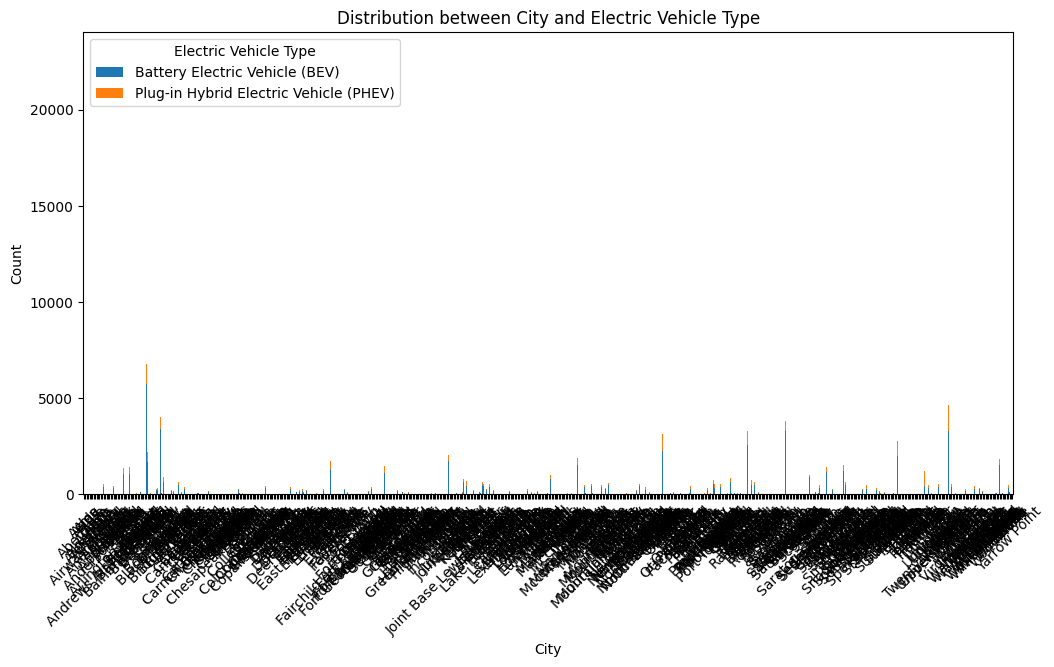

In [16]:
grouped_df = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(12, 6))

ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Distribution between City and Electric Vehicle Type')
ax.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)

plt.show()
